In [29]:
import re
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt

In [2]:
def split_by_character_count(word_list):
    count_dict = defaultdict(list)
    for word in word_list:
        count_dict[len(word)].append(word)
    return count_dict

def plot_word_counts(counts_dict):
    max_count = max(counts_dict.keys())
    x = list(range(max_count+1))
    y = []
    for c in x:
        y.append(len(counts_dict[c]))
    plt.bar(x, y)
    plt.title("Distribution of word size")
    plt.xlabel("Character count")
    plt.ylabel("Frequency")
    plt.show()

# Source 1 
(https://github.com/dwyl/english-words/blob/master/words_alpha.txt)

In [3]:
with open("words_alpha.txt", "r") as file:
    words_list_1 = file.read().split()
words_list_1

['a',
 'aa',
 'aaa',
 'aah',
 'aahed',
 'aahing',
 'aahs',
 'aal',
 'aalii',
 'aaliis',
 'aals',
 'aam',
 'aani',
 'aardvark',
 'aardvarks',
 'aardwolf',
 'aardwolves',
 'aargh',
 'aaron',
 'aaronic',
 'aaronical',
 'aaronite',
 'aaronitic',
 'aarrgh',
 'aarrghh',
 'aaru',
 'aas',
 'aasvogel',
 'aasvogels',
 'ab',
 'aba',
 'ababdeh',
 'ababua',
 'abac',
 'abaca',
 'abacay',
 'abacas',
 'abacate',
 'abacaxi',
 'abaci',
 'abacinate',
 'abacination',
 'abacisci',
 'abaciscus',
 'abacist',
 'aback',
 'abacli',
 'abacot',
 'abacterial',
 'abactinal',
 'abactinally',
 'abaction',
 'abactor',
 'abaculi',
 'abaculus',
 'abacus',
 'abacuses',
 'abada',
 'abaddon',
 'abadejo',
 'abadengo',
 'abadia',
 'abadite',
 'abaff',
 'abaft',
 'abay',
 'abayah',
 'abaisance',
 'abaised',
 'abaiser',
 'abaisse',
 'abaissed',
 'abaka',
 'abakas',
 'abalation',
 'abalienate',
 'abalienated',
 'abalienating',
 'abalienation',
 'abalone',
 'abalones',
 'abama',
 'abamp',
 'abampere',
 'abamperes',
 'abamps',
 '

In [4]:
len(words_list_1)

370105

In [5]:
count_dict_1 = split_by_character_count(words_list_1)
count_dict_1

defaultdict(list,
            {1: ['a',
              'b',
              'c',
              'd',
              'e',
              'f',
              'g',
              'h',
              'i',
              'y',
              'j',
              'k',
              'l',
              'm',
              'n',
              'o',
              'p',
              'q',
              'r',
              's',
              't',
              'u',
              'v',
              'w',
              'x',
              'z'],
             2: ['aa',
              'ab',
              'ac',
              'ad',
              'ae',
              'af',
              'ag',
              'ah',
              'ai',
              'ay',
              'ak',
              'al',
              'am',
              'an',
              'ao',
              'ap',
              'aq',
              'ar',
              'as',
              'at',
              'av',
              'aw',
              'ax',
              'az',
 

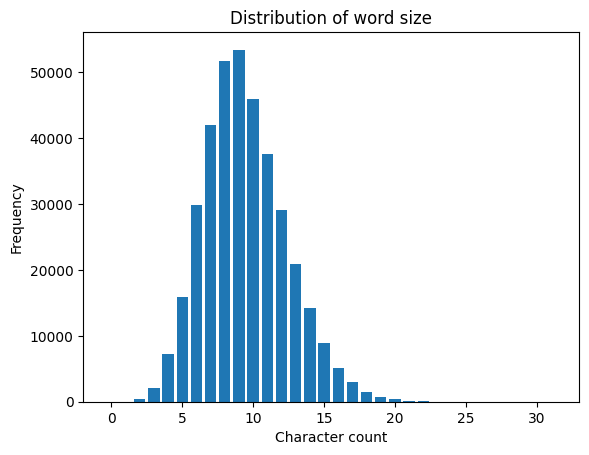

In [6]:
plot_word_counts(count_dict_1)

In [7]:
len(count_dict_1[2])

427

# Source 2
(from Kaggle)

In [8]:
words_df = pd.read_csv("word_datasets/dict.csv")
words_df

,word,definition
0,abbacy,"The word ""abbacy"" refers to the office or juri..."
1,abductor,"The word ""abductor"" refers to a person or thin..."
2,abas,"The word ""abas"" does not have a widely recogni..."
3,abasement,"The word ""abasement"" refers to the action or e..."
4,abampere,"The term ""abampere"" is a unit of electric curr..."
...,...,...
42047,worm,"The word ""worm"" can refer to several related c..."
42048,true,"The word ""true"" has several meanings in Englis..."
42049,whip,"The word ""whip"" has several meanings in Englis..."
42050,work,"The word ""work"" has several meanings in Englis..."


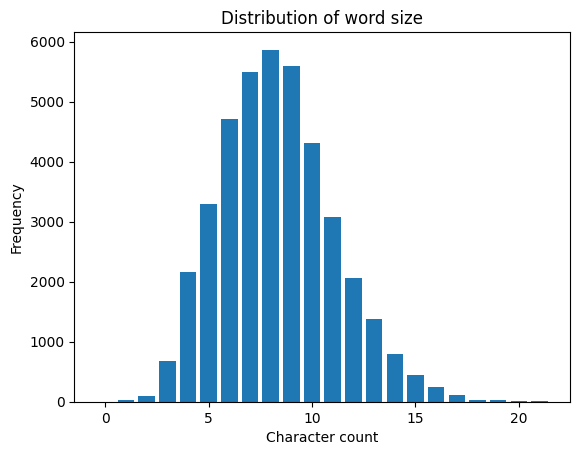

In [9]:
words_list_2 = words_df["word"].apply(lambda x: str(x).lower()).unique()
count_dict_2 = split_by_character_count(words_list_2)
plot_word_counts(count_dict_2)

In [10]:
count_dict_2[2]

['aa',
 'ab',
 'ad',
 'ai',
 'al',
 'ak',
 'am',
 'an',
 'ar',
 'as',
 'at',
 'ax',
 'ba',
 'be',
 'ca',
 'ce',
 'da',
 'de',
 'do',
 'ea',
 'ed',
 'el',
 'em',
 'en',
 'er',
 'es',
 'eu',
 'ex',
 'fa',
 'fe',
 'fo',
 'ga',
 'ge',
 'gi',
 'go',
 'ha',
 'he',
 'hi',
 'ho',
 'ie',
 'id',
 'in',
 'io',
 'it',
 'ji',
 'ka',
 'ko',
 'la',
 'li',
 'lu',
 'ma',
 'me',
 'mi',
 'mo',
 'mr',
 'mu',
 'na',
 'ne',
 'ni',
 'no',
 'nu',
 'od',
 'oh',
 'ok',
 'or',
 'os',
 'ox',
 'pa',
 'pi',
 'po',
 'pu',
 'ra',
 're',
 'ro',
 'sa',
 'se',
 'si',
 'so',
 'ta',
 'te',
 'th',
 'ti',
 'un',
 'ur',
 'us',
 'ut',
 'wa',
 'wi',
 'wu',
 'wy',
 'xi',
 'yr']

In [23]:
print(words_df[words_df['word']=='wi'])

      word                                         definition
40617   wi  The term "wi" does not have a standard definit...


# Source 3
(https://cs.stanford.edu/~knuth/sgb-words.txt)

In [24]:
words_list_3 = []
with open("sgb-words.txt", "r") as file:
    words_list_3 = file.read().split()
words_list_3

['which',
 'there',
 'their',
 'about',
 'would',
 'these',
 'other',
 'words',
 'could',
 'write',
 'first',
 'water',
 'after',
 'where',
 'right',
 'think',
 'three',
 'years',
 'place',
 'sound',
 'great',
 'again',
 'still',
 'every',
 'small',
 'found',
 'those',
 'never',
 'under',
 'might',
 'while',
 'house',
 'world',
 'below',
 'asked',
 'going',
 'large',
 'until',
 'along',
 'shall',
 'being',
 'often',
 'earth',
 'began',
 'since',
 'study',
 'night',
 'light',
 'above',
 'paper',
 'parts',
 'young',
 'story',
 'point',
 'times',
 'heard',
 'whole',
 'white',
 'given',
 'means',
 'music',
 'miles',
 'thing',
 'today',
 'later',
 'using',
 'money',
 'lines',
 'order',
 'group',
 'among',
 'learn',
 'known',
 'space',
 'table',
 'early',
 'trees',
 'short',
 'hands',
 'state',
 'black',
 'shown',
 'stood',
 'front',
 'voice',
 'kinds',
 'makes',
 'comes',
 'close',
 'power',
 'lived',
 'vowel',
 'taken',
 'built',
 'heart',
 'ready',
 'quite',
 'class',
 'bring',
 'round',


In [25]:
len(words_list_3)

5757

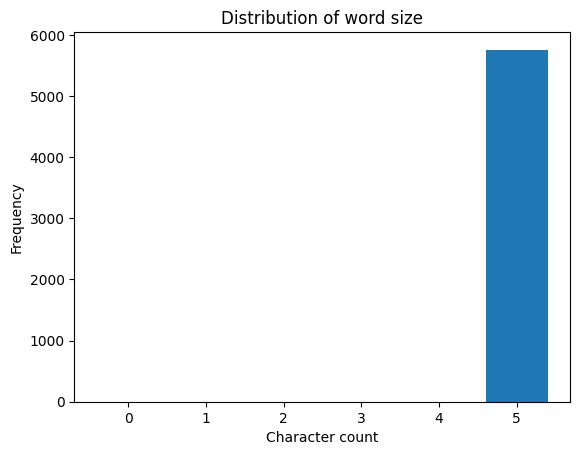

In [26]:
count_dict_3 = split_by_character_count(words_list_3)
plot_word_counts(count_dict_3)

In [27]:
# Intersection with the first set

len(set(words_list_3).intersection(set(words_list_1)))

5583

# Source 4: SCOWL (Spell Checker Oriented Word Lists) dataset
(http://wordlist.aspell.net/)

In [55]:
files_to_read = [
    "english-words.10",
    "english-words.20",
    "english-words.35",
    "english-words.40",
    "english-words.50",
    "english-words.55",
    "english-words.60",
    "english-words.70",
    "american-words.10",
    "american-words.20",
    "american-words.35",
    "american-words.40",
    "american-words.50",
    "american-words.55",
    "american-words.60",
    "american-words.70",
    "british-words.10",
    "british-words.20",
    "british-words.35",
    "british-words.40",
    "british-words.50",
    "british-words.55",
    "british-words.60",
    "british-words.70",
    "british_z-words.10",
    "british_z-words.20",
    "british_z-words.35",
    "british_z-words.40",
    "british_z-words.50",
    "british_z-words.55",
    "british_z-words.60",
    "british_z-words.70",
    "special-hacker.50"
]

folder_path = "word_datasets/scowl-2020.12.07/final/"

words_list_4 = []

for filename in files_to_read:
    with open(folder_path + filename, "r", encoding="iso-8859-1") as file:
        words = file.read().split()
        words_list_4.extend(words)

len(words_list_4)

146452

In [56]:
# Code generated by Perplexity
def is_lowercase(word):
    # only a–z, one or more chars
    return re.fullmatch(r"[a-z]+", word) is not None

In [57]:
words_list_4 = list(set([w for w in words_list_4 if is_lowercase(w)]))
len(words_list_4)

115769

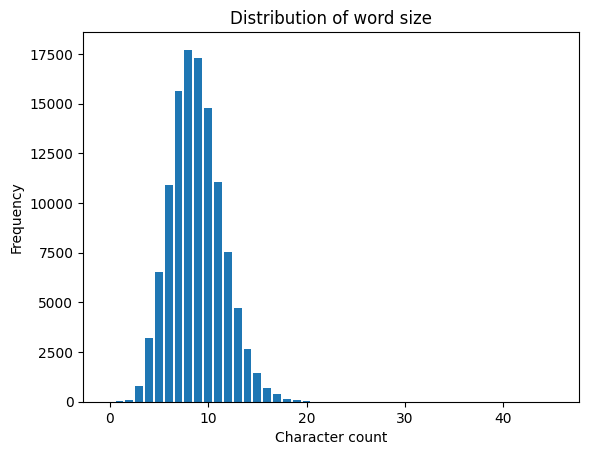

In [58]:
count_dict_4 = split_by_character_count(words_list_4)
plot_word_counts(count_dict_4)

In [59]:
with open("words_v1.txt", "w", encoding="utf-8") as file:
    file.writelines(w + "\n" for w in words_list_4)

In [60]:
# Read the file to verify
with open("words_v1.txt", "r") as file:
    temp = file.read().split()
temp

['josher',
 'invert',
 'obsessively',
 'flameout',
 'kakemono',
 'accessorizing',
 'posterns',
 'bunchy',
 'hawkbills',
 'externalize',
 'craunches',
 'aughts',
 'quantifier',
 'overselling',
 'triplets',
 'abscission',
 'byways',
 'gazumped',
 'tangibles',
 'emplacement',
 'abducted',
 'disfranchises',
 'hackles',
 'attractions',
 'degaussing',
 'wordage',
 'magnetiser',
 'wallowing',
 'euhemerise',
 'devises',
 'scrim',
 'antelope',
 'mutational',
 'frightened',
 'boudoir',
 'racialism',
 'caregiving',
 'snooker',
 'drolleries',
 'bulks',
 'peripatetic',
 'irately',
 'cellarette',
 'semblable',
 'danging',
 'lymphoid',
 'cytoplasmic',
 'coset',
 'basswoods',
 'pistole',
 'unhoused',
 'malodor',
 'borages',
 'extractions',
 'ethnologist',
 'granulated',
 'mantilla',
 'deviousness',
 'baryons',
 'unfitted',
 'hyperactively',
 'lobed',
 'incenses',
 'bound',
 'fissures',
 'pear',
 'thieving',
 'salacious',
 'slider',
 'seamount',
 'abhorrently',
 'perversion',
 'glamorising',
 'dislikin